In [10]:
import numpy as np
import matplotlib.pyplot as plt
import time
from suma_encadenada import backtracking
from concurrent.futures import ProcessPoolExecutor

def suma_encadenada_minima(n):
    if n == 1:
        return [1]
    
    sol = []
    n_aux = n
    
    while n_aux % 2 == 0 and n_aux > 2:
        n_aux //= 2
    
    if n_aux >= 100 and n_aux % 2 > 0:
        sol = suma_encadenada_minima(n_aux - 1)
        sol.append(n_aux)

    backtracking(n_aux, [1, 2], sol)

    while sol[-1] < n:
        sol.append(sol[-1] + sol[-1])
    return sol

def medir_tiempo(n):
    """
    Genera un mapa de n ciudades y mide el tiempo de ejecución de postas_hitratacion.
    """
    inicio = time.perf_counter()
    suma_encadenada_minima(n)
    fin = time.perf_counter()
    return fin - inicio

In [11]:
# Parámetros del gráfico
n_max = 6000
salto = 20

n_values = list(range(3, n_max + 1, salto))

with ProcessPoolExecutor() as executor:
    tiempos = list(executor.map(medir_tiempo, n_values))

In [43]:
# Ensure n_values is a list
n_values_corrected = list(range(3, n_max + 1, salto))

# Find the n_value corresponding to the maximum time
n_value = n_values_corrected[tiempos.index(max(tiempos)) + 13]
n_value

4483

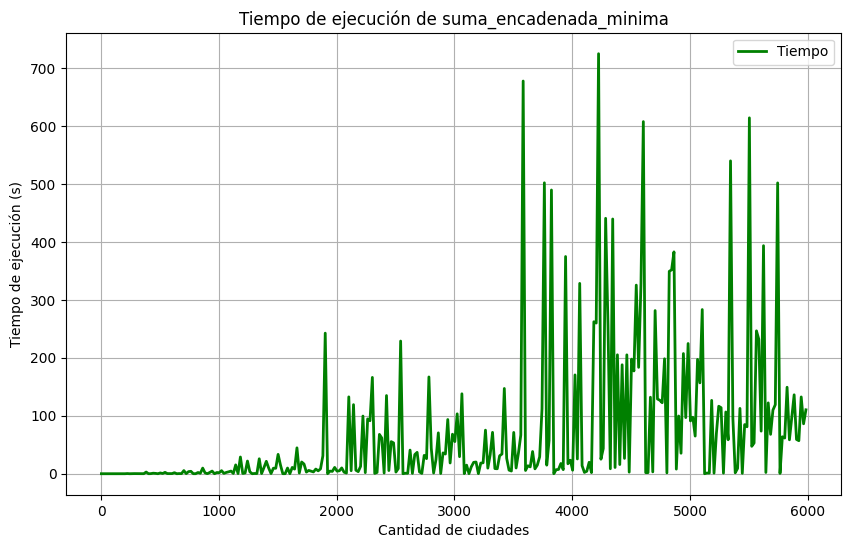

In [15]:
# Graficar
plt.figure(figsize=(10,6))
plt.plot(n_values[:len(tiempos)], tiempos, label="Tiempo", color="green", linewidth=2)
plt.xlabel("Cantidad de ciudades")
plt.ylabel("Tiempo de ejecución (s)")
plt.title("Tiempo de ejecución de suma_encadenada_minima")
plt.legend()
plt.grid(True)
plt.show()